Import and read the dataset

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("cleaned_weather_data2.csv")

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89174 entries, 0 to 89173
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            89174 non-null  object 
 1   Summary                   89174 non-null  object 
 2   Precip Type               89174 non-null  object 
 3   Temperature (C)           89174 non-null  float64
 4   Apparent Temperature (C)  89174 non-null  float64
 5   Humidity                  89174 non-null  float64
 6   Wind Speed (km/h)         89174 non-null  float64
 7   Wind Bearing (degrees)    89174 non-null  float64
 8   Visibility (km)           89174 non-null  float64
 9   Loud Cover                89174 non-null  float64
 10  Pressure (millibars)      89174 non-null  float64
 11  Daily Summary             89174 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.2+ MB
None


Correlation

Correlation Matrix:
                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.993492 -0.647394   
Apparent Temperature (C)         0.993492                  1.000000 -0.619455   
Humidity                        -0.647394                 -0.619455  1.000000   
Wind Speed (km/h)                0.019824                 -0.039646 -0.224107   
Wind Bearing (degrees)           0.025412                  0.025747  0.009915   
Visibility (km)                  0.387728                  0.379826 -0.363915   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.306141                 -0.290610  0.036374   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.019824                0.025412   
Apparent Temperature (C)          -0.039646                0.025747   
Humidity                          -0.

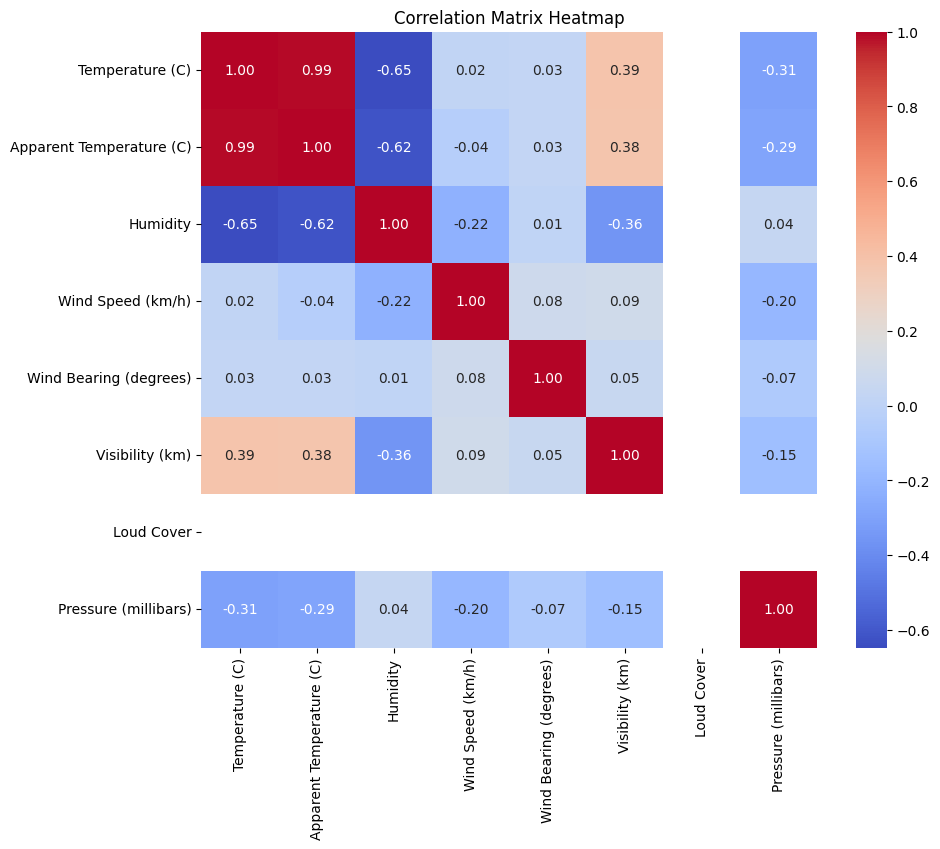

In [8]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Regression

In [9]:
#import the modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

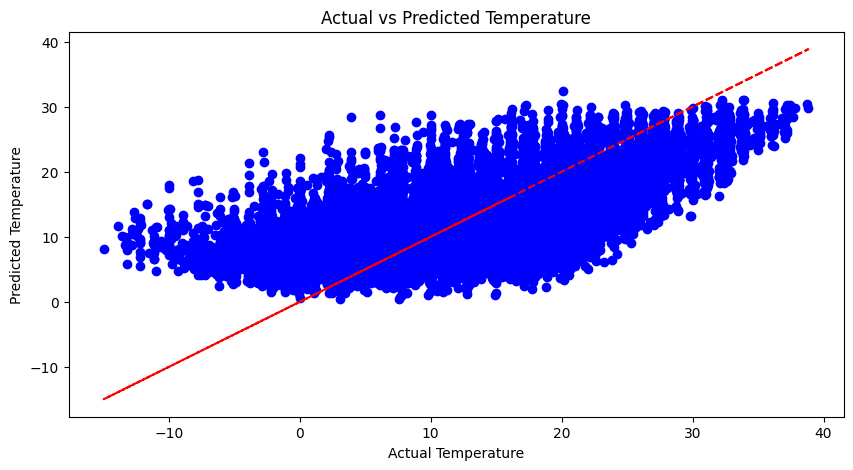

In [12]:
numeric_df = df.select_dtypes(include=[np.number])

# Selecting the features and target variable
X = numeric_df[['Humidity', 'Wind Speed (km/h)']]
y = numeric_df['Temperature (C)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizing the regression results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [13]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 49.99852583660821
R^2 Score: 0.4359799705413805
